# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import expon
from scipy import stats

In [112]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.89253441 2.3781588  2.51023262 2.5711544  2.47488667 2.74419623
 2.6167963  2.85521679 2.00016234 2.84913024]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [113]:
# your code here
def uniform_distrib(bottom, ceiling, count):
    return np.random.uniform(bottom, ceiling, count)

How are the two distributions different?

In [114]:
# your answer here:
def uniform_distrib2(bottom, ceiling, count):
    count = uniform.rvs(size=count)
    return bottom + (ceiling-bottom)*count

In [115]:
set1 = uniform_distrib(bottom=10, ceiling=15, count=100)
set1

array([14.5416643 , 10.84937816, 10.14221708, 12.81499813, 14.64143488,
       12.48809655, 14.50340261, 12.98650787, 14.34292439, 12.20056695,
       12.83601738, 11.35276854, 10.91280248, 14.03755059, 14.57562103,
       13.6803949 , 11.96367946, 12.16852432, 14.27561015, 14.96747987,
       14.76643058, 13.31116803, 11.77447597, 13.51350984, 14.94964014,
       12.7402128 , 10.50024811, 14.00081864, 10.97658943, 13.7120369 ,
       12.50606311, 12.15517226, 10.0952313 , 13.2907494 , 10.37270827,
       11.35356575, 11.54700059, 12.27624304, 10.15838709, 14.23339854,
       11.9462174 , 10.04517684, 14.02346551, 11.79259543, 10.17882561,
       11.94454211, 12.84837915, 13.8890797 , 10.25029671, 14.95773746,
       14.47467725, 12.13264821, 12.18687987, 12.44713995, 10.65757976,
       13.08992169, 12.33879838, 13.18003   , 12.15426493, 13.47241603,
       14.3075988 , 14.20164777, 10.95701268, 13.65807788, 10.04968717,
       12.73805301, 11.80997176, 12.77204114, 14.82239495, 10.85

In [116]:
set2 = uniform_distrib2(bottom=10, ceiling=60, count=1000)
set2

array([52.03106671, 53.28424259, 46.55527866, 38.18061538, 20.59258928,
       22.81831152, 37.97225053, 52.56584875, 52.93401453, 49.52296022,
       53.52959074, 22.7241719 , 49.53924135, 32.1661744 , 29.25226001,
       54.13467175, 25.05301637, 59.46684753, 43.46828458, 21.10533905,
       24.76329679, 55.60272375, 34.04854416, 57.51670815, 15.42279387,
       34.66793511, 53.98106413, 43.35060931, 49.99786131, 42.23780482,
       54.62932795, 50.55561723, 57.38850483, 52.34667052, 49.65917096,
       54.43696613, 30.16551598, 50.99745945, 59.43144676, 35.72688991,
       22.87041072, 47.65654331, 46.72213488, 18.36182819, 10.06777418,
       31.98431238, 10.08713509, 48.38086685, 16.16793009, 49.66393348,
       30.91795177, 54.93332955, 57.19642175, 24.59142887, 46.21500197,
       50.54312237, 45.79097095, 36.00275153, 49.78645541, 25.17914703,
       18.77780585, 21.25402645, 31.55861727, 29.42037132, 21.15600445,
       39.38585017, 21.79181515, 56.81777031, 19.49670552, 46.41

(array([ 77., 111., 102.,  92.,  96.,  92., 103., 111., 110., 106.]),
 array([10.06777418, 15.05812378, 20.04847339, 25.03882299, 30.02917259,
        35.01952219, 40.0098718 , 45.0002214 , 49.990571  , 54.9809206 ,
        59.9712702 ]),
 <a list of 10 Patch objects>)

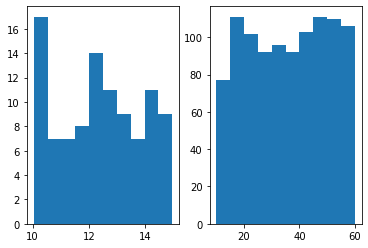

In [117]:
plt.subplot(1,2,1)
plt.hist(set1, bins =10)
plt.subplot(1,2,2)
plt.hist(set2, bins =10)

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [118]:
# your code here
def norm_dist(mean, std, count):
    return np.random.normal(mean, std, size=count)

In [119]:
num1 = norm_dist(10, 1, 1000)
num1

array([ 9.90803861,  8.04714217,  8.68245991,  9.85987553,  9.10397289,
       10.15566983,  9.39706694, 10.77870999, 10.16802269,  8.87923204,
        8.6617342 ,  9.47311005, 10.10366509, 10.85128302, 10.28903839,
        9.91899856,  9.27293253, 10.21003183, 10.51327691,  9.98890708,
        9.35269873, 10.61472159, 11.51624496, 10.03578093,  9.66542545,
        9.28607611,  9.91442464,  7.64624002,  9.73163625, 10.79812543,
       10.27884714, 10.52034671,  8.14881726, 10.68899184,  8.45229445,
        9.95503983, 10.84305267,  9.02186712,  9.70208983, 10.11204201,
       10.3771787 , 10.23775851, 10.95978814,  8.59362907,  9.7745042 ,
       10.02786784, 10.11066367, 10.5859481 , 10.8852292 ,  7.44104331,
       10.39472718,  8.09721536,  9.72631935, 11.26271492,  9.02962078,
       10.30051112, 10.42045344, 10.21448056, 10.71456715,  9.99166013,
        9.56294454,  9.79273758,  8.03515463, 10.81954599, 10.20930257,
       10.51787409,  8.29618968, 10.16903276,  9.62972061,  8.59

In [120]:
num2 = norm_dist(10, 50, 1000)
num2

array([ 9.97042295e+01,  1.32291734e+01,  1.12284673e+00,  7.36346811e+01,
        7.55493856e+01,  2.52677271e+01, -8.79137582e+00, -5.99239353e+00,
       -3.00019177e+01, -8.36824870e+01, -3.53340981e+00, -2.01586683e+01,
        9.88914647e+01, -3.16120334e+01,  9.32449071e+00, -1.30311248e+02,
        1.21825022e+02,  6.77434535e+01,  2.47618322e+01,  4.40384959e+01,
       -1.11127061e+01,  4.41515899e+01, -8.74867631e+01, -1.57341804e+01,
        1.41547190e+00, -5.14409807e+01,  1.77141988e+01,  8.46287219e+01,
        2.55630742e+01,  3.71442408e+01,  1.83504989e+00,  6.89315150e+01,
        3.15957579e+01, -2.41978557e+01,  1.22131854e+01,  6.47365437e+01,
        7.76108181e+01,  5.91998789e+01, -4.48246142e+01, -2.07425339e+01,
       -3.09311341e+01,  6.22624200e+01, -1.27117495e+02,  1.06183676e+02,
        3.02695277e+01,  1.07551209e+02,  2.75631728e+01,  1.79455594e+01,
       -3.37819428e+01,  6.92546100e+01,  4.13779329e+01,  2.31434001e+01,
        2.34701243e+00,  

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  4.,  2.,  1.,  2.,  4.,
         7., 11., 15., 13., 25., 15., 28., 32., 46., 47., 49., 55., 62.,
        53., 58., 62., 67., 44., 48., 53., 38., 40., 27., 20., 11., 12.,
        12., 14.,  5.,  4.,  6.,  3.,  0.,  0.,  1.,  1.,  1.]),
 array([-198.21808011, -190.65168971, -183.08529931, -175.51890891,
        -167.95251851, -160.38612811, -152.81973771, -145.25334731,
        -137.68695691, -130.12056651, -122.55417611, -114.98778571,
        -107.42139532,  -99.85500492,  -92.28861452,  -84.72222412,
         -77.15583372,  -69.58944332,  -62.02305292,  -54.45666252,
         -46.89027212,  -39.32388172,  -31.75749132,  -24.19110092,
         -16.62471052,   -9.05832012,   -1.49192972,    6.07446068,
          13.64085108,   21.20724148,   28.77363188,   36.34002228,
          43.90641268,   51.47280308,   59.03919348,   66.60558388,
          74.17197428,   81.73836468,   89.30475508,   96.87114548,
         104.43753588,  112.00392628

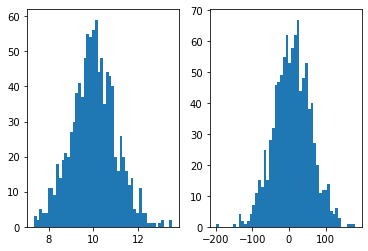

In [121]:
plt.subplot(1,2,1)
plt.hist(num1, bins = 50)
plt.subplot(1,2,2)
plt.hist(num2, bins = 50)

How are the two distributions different?

In [122]:
# your answer here:
print(f"The two distributions are different in a way that one has more higher values than the other so the curve bell goes more up. Also you can see that the ranges are quite different since plot 1 only has positive amounts and plot 2 has negative and positive amounts. I belive that can be related to the standard deviation.")

The two distributions are different in a way that one has more higher values than the other so the curve bell goes more up. Also you can see that the ranges are quite different since plot 1 only has positive amounts and plot 2 has negative and positive amounts. I belive that can be related to the standard deviation.


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [123]:
# your code here
df = pd.read_csv('vehicles.csv')
display(df)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


2. CO2 Emission Grams/Mile 

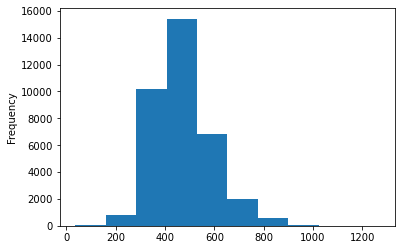

In [124]:
# your code here
df['CO2 Emission Grams/Mile'].plot.hist()

3. Combined MPG

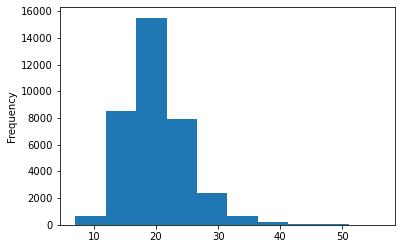

In [125]:
# your code here
df['Combined MPG'].plot.hist()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [126]:
# you answer here:
print(f"I'm really not sure but it seems that the plot Combined MPG is more similar to a normal distribution due to the bell curve, since the column values 15 and 25 are quite similar making the curve bell more similar to a normally distribution.")

I'm really not sure but it seems that the plot Combined MPG is more similar to a normal distribution due to the bell curve, since the column values 15 and 25 are quite similar making the curve bell more similar to a normally distribution.


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [127]:
# your code here
def exp_dist(mean, count):
    return np.random.exponential(mean, size=1000)

In [128]:
exp1 = exp_dist(1, 1000)

In [129]:
exp2 = exp_dist(100, 1000)

(array([67., 66., 64., 63., 53., 48., 46., 29., 42., 44., 45., 31., 39.,
        26., 26., 26., 27., 21., 16., 13., 17., 12., 15., 14., 11., 10.,
         8.,  3., 10.,  7.,  9.,  7.,  7.,  5.,  5.,  5., 11.,  5.,  3.,
         3.,  1.,  2.,  2.,  3.,  4.,  2.,  1.,  2.,  3.,  0.,  0.,  1.,
         1.,  3.,  2.,  2.,  4.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.27452421e-02, 8.10772002e+00, 1.61426948e+01, 2.41776696e+01,
        3.22126443e+01, 4.02476191e+01, 4.82825939e+01, 5.63175687e+01,
        6.43525434e+01, 7.23875182e+01, 8.04224930e+01, 8.84574678e+01,
        9.64924425e+01, 1.04527417e+02, 1.12562392e+02, 1.20597367e+02,
        1.28632342e+02, 1.36667316e+02, 1.44702291e+02, 1.52737266e+02,
        1.60772241e+02, 1.68807216e+02, 1.76842190e+02, 1.84877165e+02,
  

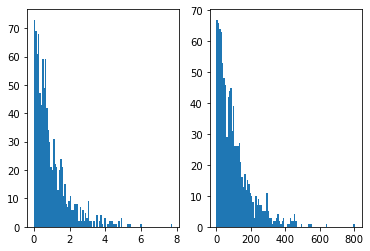

In [130]:
plt.subplot(1, 2, 1)  
plt.hist(exp1, bins=100)
plt.subplot(1, 2, 2)  
plt.hist(exp2, bins=100)

How are the two distributions different?

In [131]:
# your answer here:
print(f"The distributions seems almost the same to be honest. The plot2 has a more extensive range but I guess it was due to the difference of the mean.") 

The distributions seems almost the same to be honest. The plot2 has a more extensive range but I guess it was due to the difference of the mean.


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [136]:
# your answer here
# Hint: This is same as saying P(x<15)
lamb = 1/10
exp_dist = expon(scale=10)
print(exp_dist.cdf(15))

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [137]:
# your answer here
1-exp_dist.cdf(15)

0.2231301601484298